In [1]:
# Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Reading the file
sales = pd.read_csv("C:/Users/Arpita/Desktop/AnalytixLabs_new/Case Studies/Python Case Studies/Python Visualization Case Study/SalesData.csv")

In [17]:
# Inspect the data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


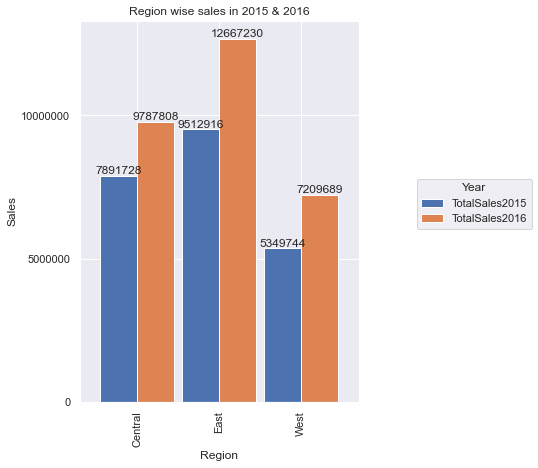

In [5]:
# Region wise sales in 2015 & 2016
sns.set_theme(style = "darkgrid")
ax = sales.groupby("Region")[['Sales2015','Sales2016']].sum().plot(kind = "bar",grid = True, figsize = (5,7), width = 0.9)
plt.legend(['TotalSales2015','TotalSales2016'], bbox_to_anchor=(1.64,.6),title ="Year")
ax.bar_label(ax.containers[0], labels = sales.groupby("Region")['Sales2015'].sum().astype(int))
ax.bar_label(ax.containers[1], labels = sales.groupby("Region")['Sales2016'].sum().astype(int))
plt.yticks([0, 5000000, 10000000])
plt.ticklabel_format(style = "plain", axis = "y")
plt.ylabel("Sales")
plt.title("Region wise sales in 2015 & 2016")
plt.show()

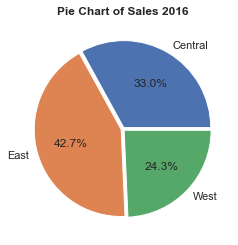

In [6]:
# Pie Chart of Sales in 2016
sales.groupby('Region').Sales2016.sum().plot(kind = "pie", autopct = '%1.01f%%', explode = [0.02,0.02,0.02])
plt.ylabel("")
plt.title("Pie Chart of Sales 2016", fontweight = "bold")
plt.show()

In [39]:
# Data preparation for faceted bar plot
summ = sales.groupby(['Tier','Region'])[['Sales2015','Sales2016']].sum().reset_index()
# Creating 'Year' variable and combining sales into a single continuous variable
df = pd.concat([summ, summ], axis = 0, ignore_index=True)
df = df.assign( Sales = df.Sales2015, Year = 2015)
df.loc[12:24, 'Year'] = 2016
df.loc[12:24, 'Sales'] = df.loc[12:24, 'Sales2016']
df = df.drop(['Sales2015', 'Sales2016'], axis = 1)

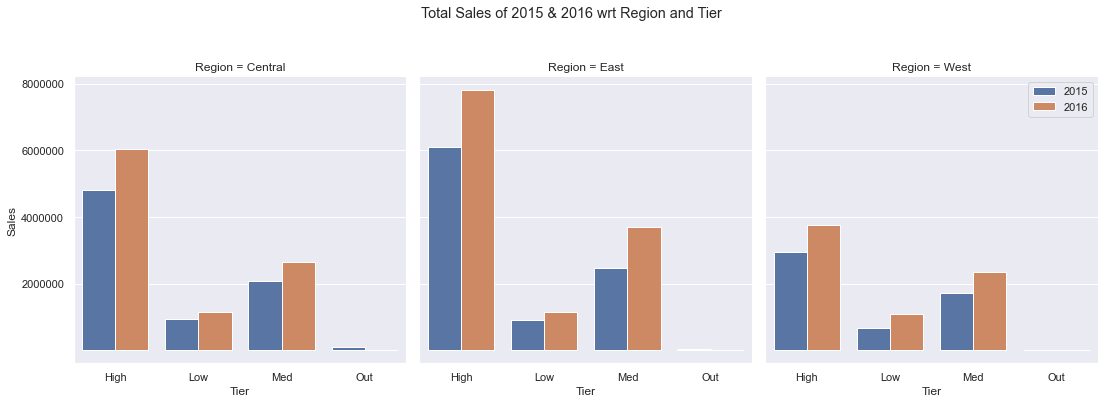

In [41]:
# Faceted plot for each region
sns.catplot(x='Tier', y='Sales', col='Region', kind='bar', hue = 'Year', data=df, legend= False)
plt.suptitle("Total Sales of 2015 & 2016 wrt Region and Tier", y  = 1.12)
plt.ticklabel_format(style='plain', axis = 'y')
plt.yticks([2000000, 4000000, 6000000, 8000000])
plt.legend(loc = 'upper right')
plt.show()

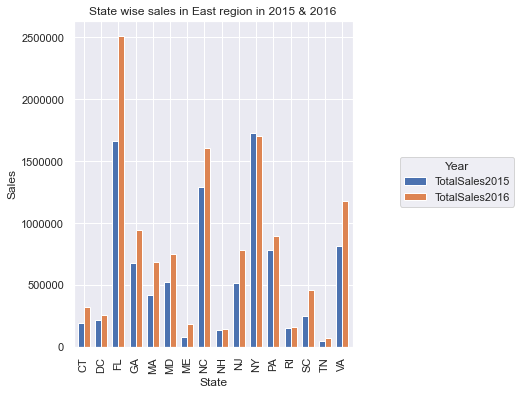

In [8]:
# State wise sales in East region in 2015 & 2016
sales[sales['Region']=="East"].groupby("State")[['Sales2015','Sales2016']].sum().plot(kind = "bar", width = 0.7, figsize=(5,6), grid = True)
plt.legend(['TotalSales2015','TotalSales2016'], bbox_to_anchor=(1.6,.6),title ="Year")
plt.ylabel("Sales")
plt.title("State wise sales in East region in 2015 & 2016")
plt.ticklabel_format(style='plain', axis = 'y')
plt.show()

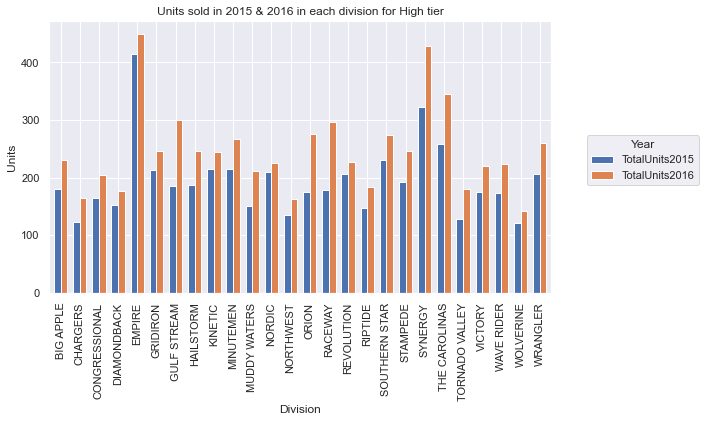

In [9]:
# Units sold in 2015 & 2016 in each division for High tier
df = sales[sales['Tier']== "High"].groupby("Division")[['Units2015','Units2016']].sum().reset_index()
df.set_index('Division').plot(kind='bar', stacked=False, width = 0.7,figsize = (9,5), grid =True)
plt.legend(['TotalUnits2015','TotalUnits2016'], bbox_to_anchor=(1.06,.6),title ="Year")
plt.ylabel("Units")
plt.title("Units sold in 2015 & 2016 in each division for High tier")
plt.show()

In [10]:
# Forming a new variable Quarter 
sales['Qtr'] = np.where(sales.Month.isin(['Jan','Feb','Mar']), "Q1", np.where(sales.Month.isin(['Apr','May','Jun']), "Q2",\
                       np.where(sales.Month.isin(['Jul','Aug','Sep']), "Q3", "Q4")))

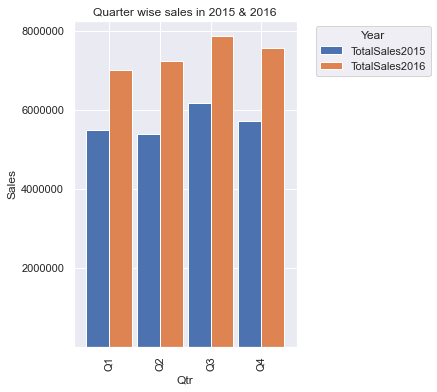

In [11]:
# Quarter wise sales in 2015 & 2016
sales.groupby('Qtr')[['Sales2015', 'Sales2016']].sum().plot(figsize = (4,6), kind = "bar", stacked = False,  width = 0.9, grid = True)
plt.legend(['TotalSales2015','TotalSales2016'], bbox_to_anchor=(1.06,1),title = "Year")
plt.yticks([2000000,4000000,6000000,8000000])
plt.ylabel("Sales")
plt.title("Quarter wise sales in 2015 & 2016")
plt.ticklabel_format(style='plain', axis = 'y')

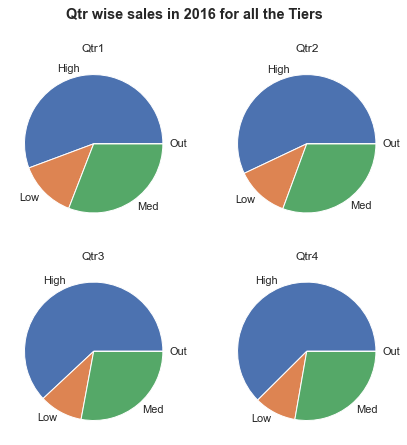

In [12]:
# Composition of Qtr wise sales in 2016 for all the Tiers
fig,ax = plt.subplots(2,2, figsize = (7,7))
plt.suptitle("Qtr wise sales in 2016 for all the Tiers", fontweight = "bold")
ax[0,0].title.set_text("Qtr1")
ax[0,0].pie(sales[(sales.Qtr == "Q1") & (sales.Sales2016 >= 0)].groupby('Tier').Sales2016.sum(), labels = ['High', 'Low', 'Med', 'Out'])
ax[0,1].title.set_text("Qtr2")
ax[0,1].pie(sales[(sales.Qtr == "Q2") & (sales.Sales2016 >= 0)].groupby('Tier').Sales2016.sum(), labels = ['High', 'Low', 'Med', 'Out'])
ax[1,0].title.set_text("Qtr3")
ax[1,0].pie(sales[(sales.Qtr == "Q3") & (sales.Sales2016 >= 0)].groupby('Tier').Sales2016.sum(), labels = ['High', 'Low', 'Med', 'Out'])
ax[1,1].title.set_text("Qtr4")
ax[1,1].pie(sales[(sales.Qtr == "Q4") & (sales.Sales2016 >= 0)].groupby('Tier').Sales2016.sum(), labels = ['High', 'Low', 'Med', 'Out'])
plt.show()